In [19]:
%load_ext autoreload
%autoreload 2

import itertools
import pickle
from tqdm import tqdm

import numpy as np
import pandas as pd
import pycuber as pc

from classes.cube_classes import Cube3State, Cube3
from generate.generate_states import generate_symmetric_cubes, ids_to_color, states_to_color
from generate.generate_random_states import generate_random_states_and_generators
from generate.symmetry_config import actions

from utils.compressions import plot_histo

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. Try out generation on concrete patterns

In [2]:
nice_pattern = ["R", "B", "L" , "U", "F'", "L", "F", "L", "L", "B'", "R'", "U'", "F", "R'", "F'", "R"]
# nice_pattern = ["F", "F", "L'", "F", "F", "R'", "D'", "F", "B'", "R", "L'", "F'", "R", "R", "U'", "B'", "D'", "B'", "R", "R", "U"]
# nice_pattern = ["R'", "B", "U'", "B", "D", "D", "B'", "U", "F", "U", "R'", "L'", "B'", "L", "L", "D", "D", "F", "F"]
# nice_pattern = ["D'", "L", "U", "D", "R", "R", "U", "U", "F'", "D", "D", "L", "U'", "D'", "R", "R", "U", "U", "B'", "D'"]

In [3]:
pattern_generated_states, pattern_state_classes_list, pattern_state2gen_dict = generate_symmetric_cubes([nice_pattern])

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.92it/s]


In [27]:
orig_cube = pc.Cube()
half = int(len(pattern_generated_states[0]) // 2)
print(len(pattern_generated_states[0]))
for state in pattern_generated_states[0]: # [:1] + pattern_generated_states[0][24:25]:
    state_clr_str = " ".join(map(str, ids_to_color(state.colors)))
    gen = pattern_state2gen_dict[state_clr_str][0]
    rot_cube = pc.Cube()
    print(' '.join(gen))
    rot_cube(' '.join(gen))
    display(rot_cube)
    print()

24
R B L U F' L F L L B' R' U' F R' F' R



D B U R F' U F U U B' D' R' F D' F' D



L B R D F' R F R R B' L' D' F L' F' L



U B D L F' D F D D B' U' L' F U' F' U



R U L F D' L D L L U' R' F' D R' D' R



D R U F L' U L U U R' D' F' L D' L' D



L D R F U' R U R R D' L' F' U L' U' L



U L D F R' D R D D L' U' F' R U' R' U



R D L B U' L U L L D' R' B' U R' U' R



D L U B R' U R U U L' D' B' R D' R' D



L U R B D' R D R R U' L' B' D L' D' L



U R D B L' D L D D R' U' B' L U' L' U



B L F U R' F R F F L' B' U' R B' R' B



B U F R D' F D F F U' B' R' D B' D' B



B R F D L' F L F F R' B' D' L B' L' B



B D F L U' F U F F D' B' L' U B' U' B



F R B U L' B L B B R' F' U' L F' L' F



F D B R U' B U B B D' F' R' U F' U' F



F L B D R' B R B B L' F' D' R F' R' F



F U B L D' B D B B U' F' L' D F' D' F



R F L D B' L B L L F' R' D' B R' B' R



D F U L B' U B U U F' D' L' B D' B' D



L F R U B' R B R R F' L' U' B L' B' L



U F D R B' D B D D F' U' R' B U' B' U


---

## 2. Generate all states up to X moves

In [4]:
X_MOVES = 6
DOUBLE_MOVES = False
DOUBLE_MOVES_NAME = 'double' if DOUBLE_MOVES else 'single'
cube_gens = [gen for i in range(1, X_MOVES + 1) for gen in itertools.product(actions, repeat=i)]

In [5]:
print(len(cube_gens))

3257436


In [6]:
def has_no_back_and_forth(x):
    for i in range(len(x)-1):
        if x[i] + "'" == x[i+1] or x[i] == x[i+1] + "'":
            return False
    return True

def has_three_in_row(x):
    for i in range(len(x)-2):
        if x[i] == x[i+1] and x[i] == x[i+2]:
            return False
    return True

cube_gens = list(filter(has_three_in_row, filter(has_no_back_and_forth, cube_gens)))
print(len(cube_gens))

2062104


In [ ]:
generated_states, state_classes_list, state2gen_dict = generate_symmetric_cubes(cube_gens, double_moves=DOUBLE_MOVES)
print(generated_states[0][0].colors)

In [57]:
print(len(generated_states[0]))

12


In [ ]:
print(len([cls_lis[1] for cls_lis in state_classes_list for state in cls_lis[0]]))

105046


In [ ]:
x_moves_dataset = pd.DataFrame({
    'state': [state for cls_list in generated_states for state in cls_list],
    'colors': [ids_to_color(state.colors) for cls_list in generated_states for state in cls_list],
    'class_id': [i for i, cls_list in enumerate(generated_states) for _ in cls_list],
    'distance': [cls_list[1] for cls_list in state_classes_list for _ in cls_list[0]],
    'generator': [state2gen_dict[" ".join(map(str, ids_to_color(state.colors)))] for cls_list in generated_states for state in cls_list]
})
display(x_moves_dataset.head())

,state,colors,class_id,distance,generator
0,<classes.cube_classes.Cube3State object at 0x0...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, ...",0,1,[[U']]
1,<classes.cube_classes.Cube3State object at 0x0...,"[0, 0, 0, 0, 0, 0, 5, 5, 5, 1, 1, 1, 1, 1, 1, ...",0,1,[[R']]
2,<classes.cube_classes.Cube3State object at 0x0...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, ...",0,1,[[D']]
3,<classes.cube_classes.Cube3State object at 0x0...,"[4, 4, 4, 0, 0, 0, 0, 0, 0, 5, 5, 5, 1, 1, 1, ...",0,1,[[L']]
4,<classes.cube_classes.Cube3State object at 0x0...,"[0, 0, 3, 0, 0, 3, 0, 0, 3, 2, 1, 1, 2, 1, 1, ...",0,1,[[F']]


Delete all zero states

In [ ]:
zero_state = Cube3().generate_goal_states(1)[0]
print(zero_state.colors)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53]


In [ ]:
display(x_moves_dataset[x_moves_dataset['state'] == zero_state])
x_moves_dataset = x_moves_dataset.drop(x_moves_dataset[x_moves_dataset['state'] == zero_state].index)
display(x_moves_dataset[x_moves_dataset['state'] == zero_state])

,state,colors,class_id,distance,generator
1749,<classes.cube_classes.Cube3State object at 0x0...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, ...",45,4,"[[U', D', U, D]]"


,state,colors,class_id,distance,generator


In [ ]:
x_moves_dataset.to_pickle(f'data/processed/{X_MOVES}_moves_dataset_{DOUBLE_MOVES_NAME}.pkl')

In [ ]:
print(len(x_moves_dataset.index))

105045


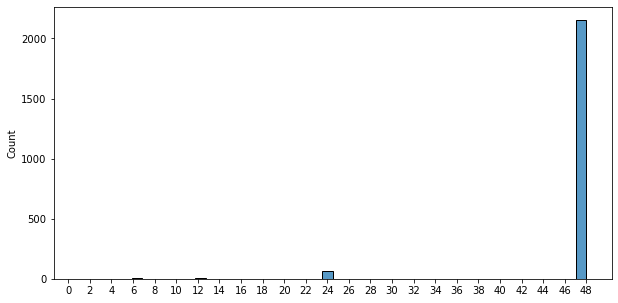

In [ ]:
class_compressions = list(map(len, generated_states))
plot_histo(class_compressions, f'imgs/dataset_visualizations/all_{X_MOVES}_moves_class_sizes_histo_{DOUBLE_MOVES_NAME}.png')

### Plotting the symmetry compressions per distance from goal

1 move(s) from goal


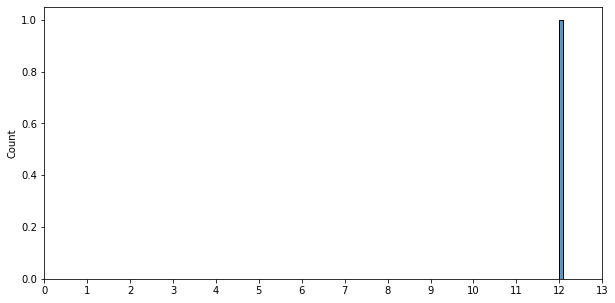


2 move(s) from goal


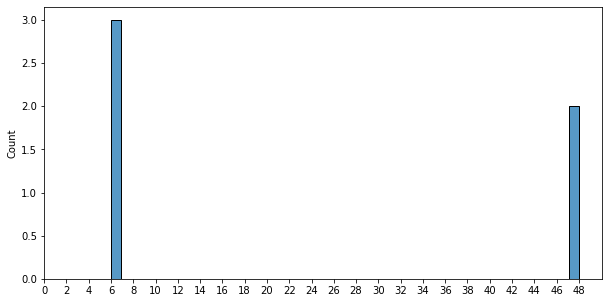


3 move(s) from goal


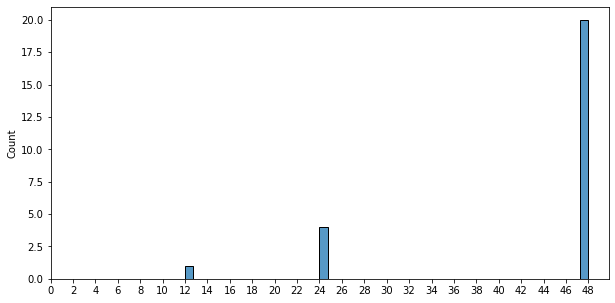


4 move(s) from goal


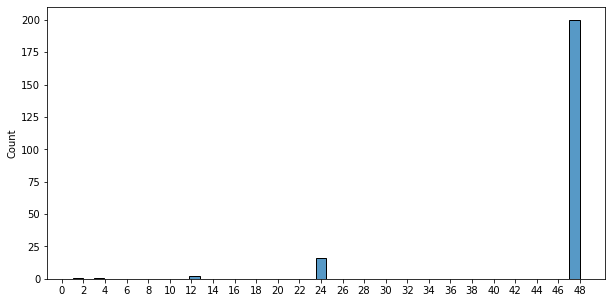


5 move(s) from goal


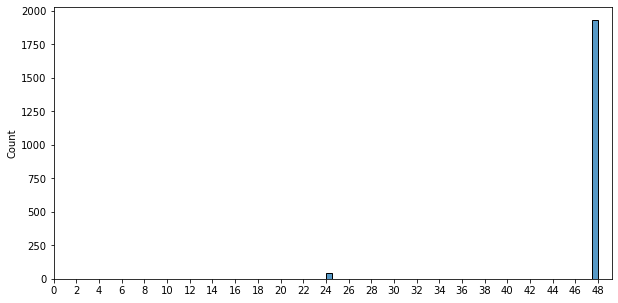

In [ ]:
for move_nr in range(1, X_MOVES + 1):
    filtered_gen_states = np.array(generated_states, dtype=object)[(np.array(list(map(lambda x: x[1], state_classes_list)), dtype=object) == int(move_nr))]
    print(f'{move_nr} move(s) from goal')
    filtered_class_compressions = list(map(len, filtered_gen_states))
    plot_histo(filtered_class_compressions, f'imgs/dataset_visualizations/{move_nr}moves_class_sizes_histo_{DOUBLE_MOVES_NAME}.png')
    print()

---

# 3. Construct states (and their symmetry-equivalent counterparts) from Kociemba's optimally solved dataset

In [2]:
import re

In [20]:
generators_kociemba, distances_kociemba = [], []

with open('data/kociemba100000optcubes.txt', 'r') as f:
    for i, line in tqdm(enumerate(f)):
        line = line.strip()
        generator_str, distance_raw = line.split('  ')
        distance = int(re.findall(r'\d+', distance_raw)[0])
        generator_str = re.sub(r"([A-Z])2(\')?", r"\1\2 \1\2", generator_str)
        generator = generator_str.split()
        
        generators_kociemba.append(generator)
        distances_kociemba.append(distance)

100000it [00:04, 20790.15it/s]


In [ ]:
generated_states_kociemba, state_classes_list_kociemba, state2gen_dict_kociemba = generate_symmetric_cubes(generators_kociemba, cube_gens_lengths=distances_kociemba)
print(generated_states_kociemba[0][0].colors)

In [57]:
print(len(generated_states_kociemba[0]))

12


In [ ]:
print(len([cls_lis[1] for cls_lis in state_classes_list_kociemba for state in cls_lis[0]]))

105046


In [ ]:
kociemba_dataset = pd.DataFrame({
    'state': [state for cls_list in generated_states_kociemba for state in cls_list],
    'colors': [ids_to_color(state.colors) for cls_list in generated_states_kociemba for state in cls_list],
    'class_id': [i for i, cls_list in enumerate(generated_states_kociemba) for _ in cls_list],
    'distance': [cls_list[1] for cls_list in state_classes_list_kociemba for _ in cls_list[0]],
    'generator': [state2gen_dict_kociemba[" ".join(map(str, ids_to_color(state.colors)))] for cls_list in generated_states_kociemba for state in cls_list]
})
display(kociemba_dataset.head())

,state,colors,class_id,distance,generator
0,<classes.cube_classes.Cube3State object at 0x0...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, ...",0,1,[[U']]
1,<classes.cube_classes.Cube3State object at 0x0...,"[0, 0, 0, 0, 0, 0, 5, 5, 5, 1, 1, 1, 1, 1, 1, ...",0,1,[[R']]
2,<classes.cube_classes.Cube3State object at 0x0...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, ...",0,1,[[D']]
3,<classes.cube_classes.Cube3State object at 0x0...,"[4, 4, 4, 0, 0, 0, 0, 0, 0, 5, 5, 5, 1, 1, 1, ...",0,1,[[L']]
4,<classes.cube_classes.Cube3State object at 0x0...,"[0, 0, 3, 0, 0, 3, 0, 0, 3, 2, 1, 1, 2, 1, 1, ...",0,1,[[F']]


Delete all zero states

In [ ]:
kociemba_dataset.to_pickle(f'data/processed/kociemba_dataset.pkl')

In [ ]:
print(len(kociemba_dataset.index))

105045


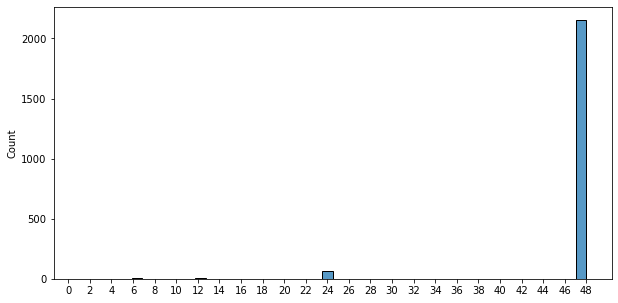

In [ ]:
class_compressions_kociemba = list(map(len, generated_states_kociemba))
plot_histo(class_compressions_kociemba, f'imgs/dataset_visualizations/kociemba/all_kociemba_class_sizes_histo.png')

### Plotting the symmetry compressions per distance from goal

1 move(s) from goal


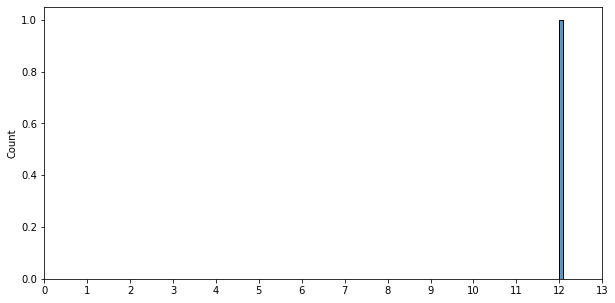


2 move(s) from goal


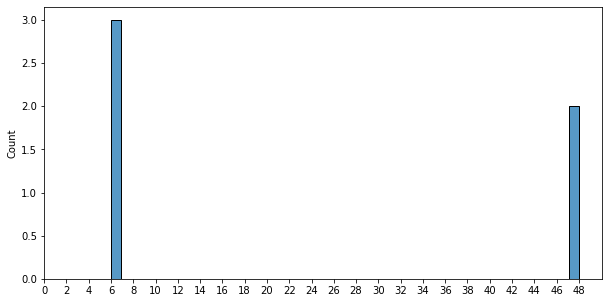


3 move(s) from goal


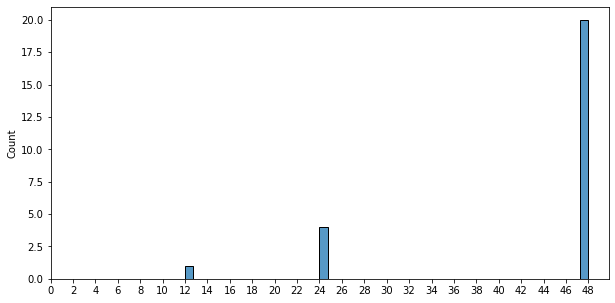


4 move(s) from goal


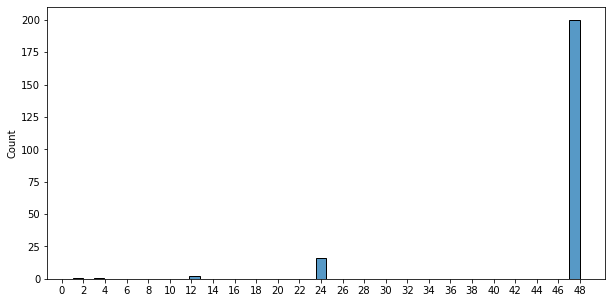


5 move(s) from goal


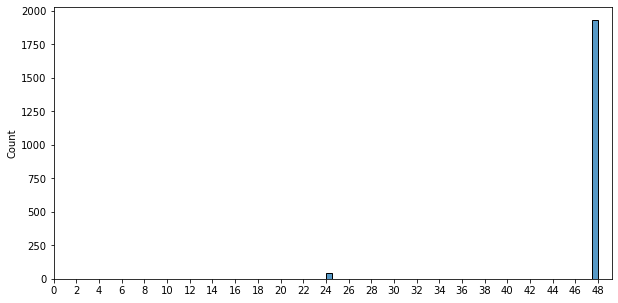

In [ ]:
for move_nr in sorted(list(set(distances_kociemba))):
    filtered_gen_states = np.array(generated_states_kociemba, dtype=object)[(np.array(list(map(lambda x: x[1], state_classes_list_kociemba)), dtype=object) == int(move_nr))]
    print(f'{move_nr} move(s) from goal')
    filtered_class_compressions = list(map(len, filtered_gen_states))
    plot_histo(filtered_class_compressions, f'imgs/dataset_visualizations/kociemba/kociemba_{move_nr}moves_class_sizes_histo.png')
    print()

---

## 4. Generate my own random states

In [ ]:
N_RANDOM_STATES = 10000

In [ ]:
states, scramble_nums, random_gens = generate_random_states_and_generators(N_RANDOM_STATES, (1, 24))
print(len(random_gens))
random_gens = list(set(map(tuple, random_gens)))
random_gens = sorted(random_gens, key=lambda x: len(x))
print(len(random_gens))

10000
9242


In [ ]:
generated_rnd_states, state_classes_rnd_list, state2gen_rnd_dict = generate_symmetric_cubes(random_gens)
print(generated_rnd_states[0][0].colors)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9242/9242 [2:50:13<00:00,  1.11s/it]

[ 0  1  2  3  4  5  6  7  8 11 14 17 10 13 16  9 12 15 45 19 20 48 22 23
 51 25 26 36 28 29 39 31 32 42 34 35 18 37 38 21 40 41 24 43 44 27 46 47
 30 49 50 33 52 53]


In [ ]:
rnd_moves_dataset = pd.DataFrame({
    'state': [state for cls_list in generated_rnd_states for state in cls_list],
    'colors': [ids_to_color(state.colors) for cls_list in generated_rnd_states for state in cls_list],
    'class_id': [i for i, cls_list in enumerate(generated_rnd_states) for _ in cls_list],
    'distance': [None for cls_list in state_classes_rnd_list for _ in cls_list[0]],
    'generator': [state2gen_rnd_dict[" ".join(map(str, ids_to_color(state.colors)))] for cls_list in generated_rnd_states for state in cls_list]
})
display(rnd_moves_dataset.head())

,state,colors,class_id,distance,generator
0,<classes.cube_classes.Cube3State object at 0x0...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, ...",0,None,[[D]]
1,<classes.cube_classes.Cube3State object at 0x0...,"[5, 5, 5, 0, 0, 0, 0, 0, 0, 4, 4, 4, 1, 1, 1, ...",0,None,[[L]]
2,<classes.cube_classes.Cube3State object at 0x0...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, ...",0,None,[[U]]
3,<classes.cube_classes.Cube3State object at 0x0...,"[0, 0, 0, 0, 0, 0, 4, 4, 4, 1, 1, 1, 1, 1, 1, ...",0,None,[[R]]
4,<classes.cube_classes.Cube3State object at 0x0...,"[3, 0, 0, 3, 0, 0, 3, 0, 0, 1, 1, 2, 1, 1, 2, ...",0,None,[[B]]


In [ ]:
display(rnd_moves_dataset[rnd_moves_dataset['state'] == zero_state])
rnd_moves_dataset = rnd_moves_dataset.drop(rnd_moves_dataset[rnd_moves_dataset['state'] == zero_state].index)
display(rnd_moves_dataset[rnd_moves_dataset['state'] == zero_state])

,state,colors,class_id,distance,generator
126,<classes.cube_classes.Cube3State object at 0x0...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, ...",6,None,"[[F', F]]"


,state,colors,class_id,distance,generator


In [ ]:
rnd_moves_dataset.to_pickle(f'data/processed/rand{N_RANDOM_STATES}_moves_dataset.pkl')

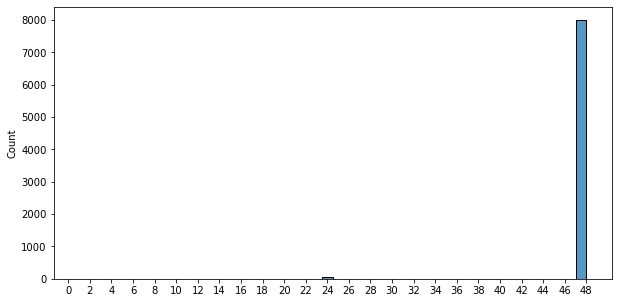

In [ ]:
class_compressions = list(map(len, generated_rnd_states))
plot_histo(class_compressions, f'imgs/dataset_visualizations/rand{N_RANDOM_STATES}_class_sizes_histo.png')